# Import package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

# pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows',None)

# Load data

In [2]:
match_path = "D:\Git_desktop\Intro_data_science_new\Crawl_data_and _reformat_data\match_all_season.csv"

In [3]:
match_df = pd.read_csv(match_path)
match_df.drop(['Unnamed: 0'], axis=1, inplace=True)
match_df = match_df.replace(-1, 0)
match_df.head

C:\Users\ngduc\AppData\Local\Temp\ipykernel_19752\2505109444.py:1: DtypeWarning: Columns (9,277) have mixed types. Specify dtype option on import or set low_memory=False.
  match_df = pd.read_csv(match_path)


<bound method NDFrame.head of           id   season                       label              ground  clock  \
0      75290  2022-23  Sun 28 May 2023, 16:30 BST  St. Mary's Stadium   5880   
1      75289  2022-23  Sun 28 May 2023, 16:30 BST        Old Trafford   5700   
2      75288  2022-23  Sun 28 May 2023, 16:30 BST  King Power Stadium   5820   
3      75287  2022-23  Sun 28 May 2023, 16:30 BST         Elland Road   5760   
4      75286  2022-23  Sun 28 May 2023, 16:30 BST       Goodison Park   6060   
...      ...      ...                         ...                 ...    ...   
12020      5  1992-93  Sat 15 Aug 1992, 15:00 BST       Goodison Park   5400   
12021      4  1992-93  Sat 15 Aug 1992, 15:00 BST       Selhurst Park   5400   
12022      3  1992-93  Sat 15 Aug 1992, 15:00 BST      Highfield Road   5400   
12023      2  1992-93  Sat 15 Aug 1992, 15:00 BST     Stamford Bridge   5400   
12024      1  1992-93  Sat 15 Aug 1992, 15:00 BST            Highbury   5400   

         

In [4]:
list(match_df.columns)

['id',
 'season',
 'label',
 'ground',
 'clock',
 'name_1',
 'id_1',
 'score_1',
 'formation_1',
 'lineup_player_id_0_1',
 'lineup_player_id_1_1',
 'lineup_player_id_2_1',
 'lineup_player_id_3_1',
 'lineup_player_id_4_1',
 'lineup_player_id_5_1',
 'lineup_player_id_6_1',
 'lineup_player_id_7_1',
 'lineup_player_id_8_1',
 'lineup_player_id_9_1',
 'lineup_player_id_10_1',
 'sub_player_id_0_1',
 'sub_player_id_1_1',
 'sub_player_id_2_1',
 'sub_player_id_3_1',
 'sub_player_id_4_1',
 'sub_player_id_5_1',
 'sub_player_id_6_1',
 'sub_player_id_7_1',
 'sub_player_id_8_1',
 'formation_used_1',
 'open_play_pass_1',
 'possession_percentage_1',
 'poss_lost_ctrl_1',
 'poss_lost_all_1',
 'duel_won_1',
 'fwd_pass_1',
 'touches_1',
 'total_pass_1',
 'total_back_zone_pass_1',
 'aerial_won_1',
 'successful_open_play_pass_1',
 'long_pass_own_to_opp_success_1',
 'total_throws_1',
 'ball_recovery_1',
 'passes_right_1',
 'total_chipped_pass_1',
 'total_final_third_passes_1',
 'accurate_back_zone_pass_1',
 '

# Match EDA

## Tỉ lệ thắng thua sân nhà, sân khách

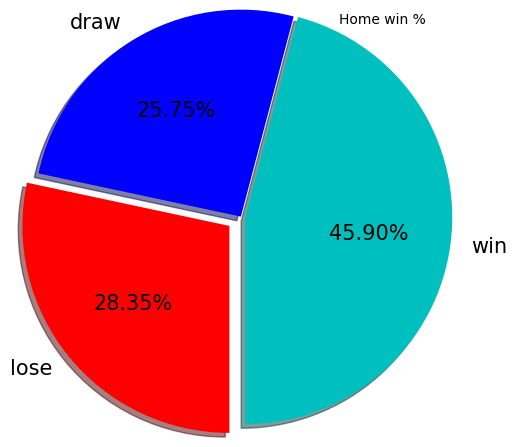

In [5]:
homewin = len(match_df.loc[match_df['score_1']>match_df['score_2']])
homedraw = len(match_df.loc[match_df['score_1']==match_df['score_2']])
homelose = len(match_df.loc[match_df['score_1']<match_df['score_2']])

textprops = {"fontsize":15}
explode = [0.03,0,0.1] # To slice the perticuler section
colors = ["c", 'b','r','y','g']
plt.pie(
        [homewin,homedraw, homelose], labels = ['win', 'draw', 'lose'],
        explode = explode, # To slice the perticuler section
        colors =colors, # Color of each section
        autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.4, # Radius to increase or decrease the size of pie chart 
        startangle = 270, # Start angle of first section
        textprops =textprops
        )
plt.title('Home win %', fontsize=10, loc='right')
plt.show()

## Tỉ lệ ghi bàn vào các vị trí trong goal

In [6]:
for i in list(match_df.columns):
    if "goal" in i and "att" in i:
        print(i)

att_rf_goal_1
att_ibox_goal_1
att_goal_low_right_1
att_obox_goal_1
att_lf_goal_1
att_goal_low_centre_1
att_goal_low_left_1
att_goal_high_right_1
att_hd_goal_1
att_goal_high_left_1
att_obp_goal_1
att_ibox_own_goal_1
att_pen_goal_1
att_goal_high_centre_1
att_freekick_goal_1
att_obox_own_goal_1
att_rf_goal_2
att_ibox_goal_2
att_goal_low_right_2
att_obox_goal_2
att_lf_goal_2
att_goal_low_centre_2
att_goal_low_left_2
att_goal_high_right_2
att_hd_goal_2
att_goal_high_left_2
att_obp_goal_2
att_ibox_own_goal_2
att_pen_goal_2
att_goal_high_centre_2
att_freekick_goal_2
att_obox_own_goal_2


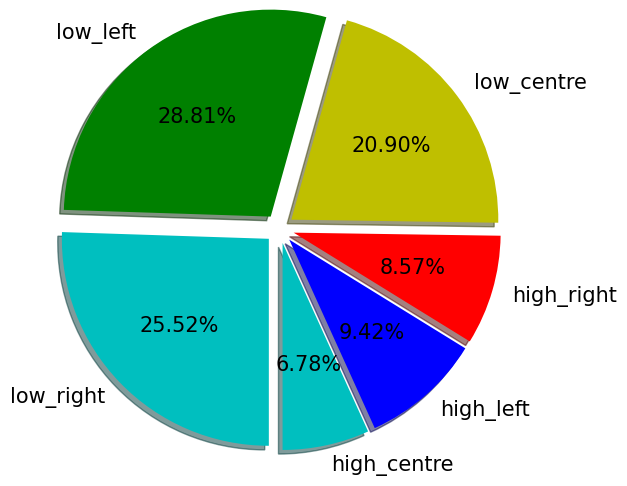

In [7]:
import matplotlib.pyplot as plt
def goalPosition_season(season):
    goal = match_df.loc[match_df['season'] == season]
    goal = goal[['att_goal_high_centre_1', 'att_goal_low_centre_1',
                'att_goal_high_left_1', 'att_goal_high_right_1',
                'att_goal_low_left_1', 'att_goal_low_right_1',
                'att_goal_high_centre_2', 'att_goal_low_centre_2',
                'att_goal_high_left_2', 'att_goal_high_right_2',
                'att_goal_low_left_2', 'att_goal_low_right_2']].sum()
    high_centre = goal['att_goal_high_centre_2'] + goal['att_goal_high_centre_1']
    high_left = goal['att_goal_high_left_2'] + goal['att_goal_high_left_1']
    high_right = goal['att_goal_high_right_2'] + goal['att_goal_high_right_1']
    low_centre = goal['att_goal_low_centre_2'] + goal['att_goal_low_centre_1']
    low_left = goal['att_goal_low_left_2'] + goal['att_goal_low_left_1']
    low_right = goal['att_goal_low_right_2'] + goal['att_goal_low_right_1']

    explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
    colors = ["c", 'b', 'r', 'y', 'g']
    plt.pie([high_centre, high_left, high_right, low_centre, low_left, low_right],labels=['high_centre', 'high_left', 'high_right', 'low_centre', 'low_left', 'low_right'],
            explode=explode,
            colors=colors,
            autopct="%0.2f%%",
            shadow=True,
            radius=1.4,
            startangle=270,
            textprops={"fontsize": 15}  # Fix typo here
            )
    plt.show()

goalPosition_season('2022-23')


## compare index of attributes of two teams

In [8]:
team_path = "D:/Git_desktop/Intro_data_science_new/Crawl_data_and _reformat_data/teams_all_season.csv"

team_df = pd.read_csv(team_path)
team_df.drop(['Unnamed: 0'], axis=1, inplace=True)
team_df = team_df.replace(-1, 0)
team_df.head

C:\Users\ngduc\AppData\Local\Temp\ipykernel_19752\1945381174.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  team_df = pd.read_csv(team_path)


<bound method NDFrame.head of        id_match   season               name  id  score result formation  \
0         75290  2022-23        Southampton  20      4    tie   4-2-3-1   
1         75290  2022-23          Liverpool  10      4    tie     4-3-3   
2         75289  2022-23  Manchester United  12      2    win   4-2-3-1   
3         75289  2022-23             Fulham  34      1   lose   4-2-3-1   
4         75288  2022-23     Leicester City  26      2    win   4-2-3-1   
...         ...      ...                ...  ..    ...    ...       ...   
24045         3  1992-93      Middlesbrough  13      1   lose         0   
24046         2  1992-93            Chelsea   4      1    tie         0   
24047         2  1992-93    Oldham Athletic  16      1    tie         0   
24048         1  1992-93            Arsenal   1      2   lose         0   
24049         1  1992-93       Norwich City  14      4    win         0   

       lineup_player_id_0  lineup_player_id_1  lineup_player_id_2  ..

In [9]:
def 

homewin = len(match_df.loc[match_df['score_1']>match_df['score_2']])
homedraw = len(match_df.loc[match_df['score_1']==match_df['score_2']])
homelose = len(match_df.loc[match_df['score_1']<match_df['score_2']])

textprops = {"fontsize":15}
explode = [0.03,0,0.1] # To slice the perticuler section
colors = ["c", 'b','r','y','g']
plt.pie(
        [homewin,homedraw, homelose], labels = ['win', 'draw', 'lose'],
        explode = explode, # To slice the perticuler section
        colors =colors, # Color of each section
        autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.4, # Radius to increase or decrease the size of pie chart 
        startangle = 270, # Start angle of first section
        textprops =textprops
        )
plt.title('Home win %', fontsize=10, loc='right')
plt.show()

SyntaxError: invalid syntax (4083284183.py, line 1)

In [10]:
player_path = "D:/Git_desktop/Intro_data_science_new/Crawl_data_and _reformat_data/player_all_season.csv"

player_df = pd.read_csv(player_path)
player_df.drop(['Unnamed: 0'], axis=1, inplace=True)
player_df = player_df.replace(-1, 0)
player_df.head

<bound method NDFrame.head of             id  playerId             name   season position  shirtNum  \
0      54760.0  344441.0      Matt Turner  2022-23        G       1.0   
1      13559.0  348160.0    Axel Tuanzebe  2022-23        D      40.0   
2      51484.0  324077.0   Antef Tsoungui  2022-23        D      46.0   
3      16006.0  187644.0  Kostas Tsimikas  2022-23        D      21.0   
4      54831.0  343519.0    Auston Trusty  2022-23        D       5.0   
...        ...       ...              ...      ...      ...       ...   
23229    463.0     445.0    Bradley Allen  1992-93        F       0.0   
23230    526.0     506.0      Derek Allan  1992-93        D       0.0   
23231    611.0    1478.0      Steve Agnew  1992-93        M       0.0   
23232      3.0       3.0       Tony Adams  1992-93        D       0.0   
23233    180.0   41775.0      Gary Ablett  1992-93        D       0.0   

                  positionInfo        country  birth  age  ...  att_lg_left  \
0             

In [ ]:
def season_before():

def get_attribute_player(id_player, attribute, season):
    value = 0
    while value != 0:
        value = 

def get_mean_data(id_player,attribute = , season = ):
    for i in id_player:
        get
    